<a href="https://colab.research.google.com/github/hyunjung930/machine-learning/blob/hyunjung/d04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [65]:
%matplotlib inline

In [66]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [67]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data.shape

(49, 2)

In [68]:
np.ones((3,4), dtype = 'int') #dtype을 이용해서 타입 지정 가능.

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [69]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [70]:
np.unique(fish_target, return_counts = True) # return_counts : 빈도수

(array([0., 1.]), array([14, 35]))

In [71]:
14/49, 35/49

(0.2857142857142857, 0.7142857142857143)

In [72]:
from sklearn.model_selection import train_test_split
#긴 라인을 쓸 때 줄 이음표 사용 한다.(가독성)
train_input, test_input, train_target, test_target = \
  train_test_split(fish_data, fish_target, test_size = 0.25, random_state=42, stratify=fish_target) 
#test_size: 0.25가 디폴트
# stratify: 전체 데이터의 target을 넣어줘야 한다.

In [73]:
train_input.shape, train_target.shape

((36, 2), (36,))

In [74]:
test_input.shape, test_target.shape

((13, 2), (13,))

In [75]:
np.unique(train_target,return_counts = True)

(array([0., 1.]), array([10, 26]))

In [76]:
10/36,26/36

(0.2777777777777778, 0.7222222222222222)

In [77]:
np.unique(test_target,return_counts = True)

(array([0., 1.]), array([4, 9]))

In [78]:
4/13, 9/13

(0.3076923076923077, 0.6923076923076923)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
#print(kn.score(test_input, test_target))
y_pred = kn.predict(test_input)
print(accuracy_score(test_target,kn.predict(test_input)))

1.0


In [80]:
kn.predict([[25,150]]) #이렇게 출력하면 빙어의 값이 나옴

array([0.])

In [81]:
dist,idx = kn.kneighbors([[25,150]])

In [82]:
dist #distance return값 가장 가까운 거리의 5개 값(defalut = 5)

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [83]:
idx

array([[21, 33, 19, 30,  1]])

In [84]:
#fancy indexing :인덱스 배열을 전달하면 해당 인덱스를 select할 수 있다.
train_target[idx[0]] #0을 준 이유는 2차원 구조이기 때문.

array([1., 0., 0., 0., 0.])

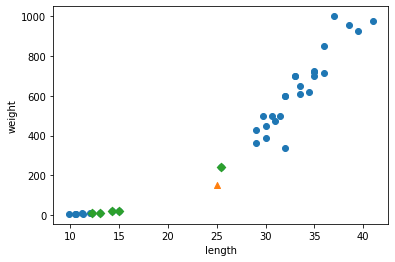

In [85]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker ='^')
plt.scatter(train_input[idx[0],0], train_input[idx[0],1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

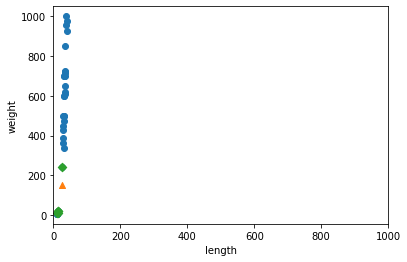

In [86]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker ='^')
plt.scatter(train_input[idx[0],0], train_input[idx[0],1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.show()

In [87]:
#평균 x_train => train_input
train_mean = np.mean(train_input)
#표준편차
train_std = np.std(train_input)

In [88]:
train_mean

240.6972222222222

In [89]:
train_std

312.8106242744172

In [90]:
train_scaled = (train_input - train_mean) / train_std

In [91]:
train_mean

240.6972222222222

In [92]:
train_std

312.8106242744172

In [116]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [117]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [118]:
test_scaled = (test_input - train_mean) / train_std
test_scaled

array([[-0.73430122, -0.73845709],
       [-0.73174376, -0.73781772],
       [-0.67452064,  0.6691038 ],
       [-0.73174376, -0.73749804],
       [-0.68475047,  0.31745334],
       [-0.72982567, -0.72662884],
       [-0.6607743 ,  1.42035706],
       [-0.6607743 ,  1.0687066 ],
       [-0.6463886 ,  2.17161031],
       [-0.65757748,  1.40437295],
       [-0.68538984,  0.15761222],
       [-0.67036477,  0.82894492],
       [-0.63839655,  2.26751498]])

In [119]:
#예측하기
accuracy_score(test_target, kn.predict(test_scaled))

1.0

In [120]:
new_data = ([[25,100]] - train_mean) / train_std
new_data

array([[-0.6895457 , -0.44978403]])

In [121]:
dist, idx = kn.kneighbors([[-0.6895457 , -0.44978403]])

In [122]:
dist

array([[0.54039968, 0.87637829, 0.93841517, 0.99269243, 1.04498999]])

In [123]:
idx # 데이터의 가까운 값 변경

array([[21, 14,  5, 34, 33]])

In [124]:
kn.predict(new_data)

array([1.])

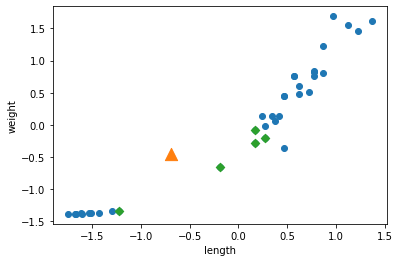

In [125]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_data[0,0], new_data[0, 1],150,marker ='^')
plt.scatter(train_scaled[idx[0],0], train_scaled[idx[0],1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()